<a href="https://colab.research.google.com/github/sreeniedp/Coursera_ML_Assignments/blob/master/New_Model1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
df1_pvt

Ct_Time,10,12,14,16,18,20,22
Ct_Date,,,,,,,
2017-12-11,754,8211,18047,25007,30213,30323,0
2017-12-12,634,6401,12708,17930,21885,22025,0
2017-12-13,476,6421,13216,18664,22771,22923,0
2017-12-14,530,6051,12362,17663,21770,21971,0
2017-12-15,482,5397,11078,15978,19833,20017,0
...,...,...,...,...,...,...,...
2020-12-26,570,8216,17375,24737,29334,29409,29409
2020-12-28,753,9803,20521,29367,35274,35403,35406
2020-12-29,551,7010,15209,22216,26689,26753,26753


In [5]:
df1_pvt.iloc[:,1]

Ct_Date
2017-12-11    8211
2017-12-12    6401
2017-12-13    6421
2017-12-14    6051
2017-12-15    5397
              ... 
2020-12-26    8216
2020-12-28    9803
2020-12-29    7010
2020-12-30    7364
2020-12-31    7044
Name: 12, Length: 958, dtype: int64

In [7]:
df12=df1_pvt.iloc[:,1]
df12=scaler.fit_transform(np.array(df12).reshape(-1,1))
train_size=int (len(df12)*.65)
test_size=(len(df12)-train_size)
train_data, test_data=df12[0:train_size,:],df10[train_size:len(df12),:1]

 # reshape into X=t,t+1,t+2,t+3 and Y=t+4 for time step 3
time_step=100
X_train, y_train= create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

# reshape input to be [sample,time_steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

 # reshape into X=t,t+1,t+2,t+3 and Y=t+4 for time step 3
time_step=100
X_train, y_train= create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

# reshape input to be [sample,time_steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

#Prediction and check performance metircs
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


#transform to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



X_input=test_data[236:].reshape(1,-1)
X_input.shape

temp_input=list(X_input)
temp_input=temp_input[0].tolist()


#demonstrate prediction for next 10 days

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
      if (len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{}day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape(1,n_steps,1)
        #print(X_input)
        yhat=model.predict(X_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
      else:
        X_input=X_input.reshape((1,n_steps,1))
        yhat=model.predict(X_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

Epoch 1/100
9/9 [==============================] - 7s 303ms/step - loss: 0.2390 - val_loss: 0.0388
Epoch 2/100
9/9 [==============================] - 2s 192ms/step - loss: 0.0355 - val_loss: 0.0125
Epoch 3/100
9/9 [==============================] - 2s 196ms/step - loss: 0.0236 - val_loss: 0.0334
Epoch 4/100
9/9 [==============================] - 2s 198ms/step - loss: 0.0258 - val_loss: 0.0157
Epoch 5/100
9/9 [==============================] - 2s 198ms/step - loss: 0.0241 - val_loss: 0.0244
Epoch 6/100
9/9 [==============================] - 2s 203ms/step - loss: 0.0215 - val_loss: 0.0188
Epoch 7/100
9/9 [==============================] - 2s 201ms/step - loss: 0.0214 - val_loss: 0.0223
Epoch 8/100
9/9 [==============================] - 2s 198ms/step - loss: 0.0194 - val_loss: 0.0212
Epoch 9/100
9/9 [==============================] - 2s 200ms/step - loss: 0.0193 - val_loss: 0.0193
Epoch 10/100
9/9 [==============================] - 2s 194ms/step - loss: 0.0212 - val_loss: 0.0225
Epoch 11/

In [4]:
import numpy as np
import pandas as pd
df= pd.read_csv ('MFL_data_sorted.csv', index_col= False)
df1_pvt=pd.pivot_table(df.reset_index(),index=['Ct_Date'],columns=['Ct_Time'],values='GLPLNOS', aggfunc='sum', fill_value=0)
df10=df1_pvt.iloc[:,0]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df10=scaler.fit_transform(np.array(df10).reshape(-1,1))

train_size=int (len(df10)*.65)
test_size=(len(df10)-train_size)
train_data, test_data=df10[0:train_size,:],df10[train_size:len(df10),:1]

import numpy as np
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
  dataX,dataY= [],[]

  for i in range (len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX),np.array(dataY)


  # reshape into X=t,t+1,t+2,t+3 and Y=t+4 for time step 3
time_step=100
X_train, y_train= create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

# reshape input to be [sample,time_steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

#Prediction and check performance metircs
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


#transform to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



X_input=test_data[236:].reshape(1,-1)
X_input.shape

temp_input=list(X_input)
temp_input=temp_input[0].tolist()


#demonstrate prediction for next 10 days

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
      if (len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{}day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape(1,n_steps,1)
        #print(X_input)
        yhat=model.predict(X_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
      else:
        X_input=X_input.reshape((1,n_steps,1))
        yhat=model.predict(X_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1



#Time 12

                                      df12=df1_pvt.iloc[:,1]
df12=scaler.fit_transform(np.array(df12).reshape(-1,1))
train_size=int (len(df12)*.65)
test_size=(len(df12)-train_size)
train_data, test_data=df12[0:train_size,:],df10[train_size:len(df12),:1]

 # reshape into X=t,t+1,t+2,t+3 and Y=t+4 for time step 3
time_step=100
X_train, y_train= create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

# reshape input to be [sample,time_steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

 # reshape into X=t,t+1,t+2,t+3 and Y=t+4 for time step 3
time_step=100
X_train, y_train= create_dataset(train_data,time_step)
X_test,y_test=create_dataset(test_data,time_step)

# reshape input to be [sample,time_steps,features] which is required for LSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

# Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

#Prediction and check performance metircs
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)


#transform to original form

train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)



X_input=test_data[236:].reshape(1,-1)
X_input.shape

temp_input=list(X_input)
temp_input=temp_input[0].tolist()


#demonstrate prediction for next 10 days

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
      if (len(temp_input)>100):
        X_input=np.array(temp_input[1:])
        print("{}day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input=X_input.reshape(1,n_steps,1)
        #print(X_input)
        yhat=model.predict(X_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
      else:
        X_input=X_input.reshape((1,n_steps,1))
        yhat=model.predict(X_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

#print (lst_output)
Pred30_10=pd.DataFrame(scaler.inverse_transform(lst_output))
Pred30_10       

Epoch 1/100
9/9 [==============================] - 8s 330ms/step - loss: 0.1551 - val_loss: 0.0290
Epoch 2/100
9/9 [==============================] - 2s 199ms/step - loss: 0.0301 - val_loss: 0.0128
Epoch 3/100
9/9 [==============================] - 2s 196ms/step - loss: 0.0247 - val_loss: 0.0181
Epoch 4/100
9/9 [==============================] - 2s 200ms/step - loss: 0.0220 - val_loss: 0.0135
Epoch 5/100
9/9 [==============================] - 2s 197ms/step - loss: 0.0236 - val_loss: 0.0197
Epoch 6/100
9/9 [==============================] - 2s 200ms/step - loss: 0.0223 - val_loss: 0.0137
Epoch 7/100
9/9 [==============================] - 2s 195ms/step - loss: 0.0248 - val_loss: 0.0178
Epoch 8/100
9/9 [==============================] - 2s 194ms/step - loss: 0.0226 - val_loss: 0.0164
Epoch 9/100
9/9 [==============================] - 2s 201ms/step - loss: 0.0209 - val_loss: 0.0160
Epoch 10/100
9/9 [==============================] - 2s 197ms/step - loss: 0.0241 - val_loss: 0.0169
Epoch 11/

,0
0,734.368975
1,730.023629
2,728.945058
3,731.023858
4,735.808244
5,742.677120
6,750.976560
7,760.108283
8,769.579143
9,779.016436


In [3]:
df

,State,Ct_Date,Day,Ct_Time,GLPLNOS
0,Andhra Pradesh,2017-12-11,Monday,10,91.0
1,Andhra Pradesh,2017-12-11,Monday,12,1117.0
2,Andhra Pradesh,2017-12-11,Monday,14,2708.0
3,Andhra Pradesh,2017-12-11,Monday,16,3761.0
4,Andhra Pradesh,2017-12-11,Monday,18,4591.0
...,...,...,...,...,...
110373,West Bengal,2020-12-31,Thursday,14,526.0
110374,West Bengal,2020-12-31,Thursday,16,794.0
110375,West Bengal,2020-12-31,Thursday,18,974.0
110376,West Bengal,2020-12-31,Thursday,20,976.0


In [5]:
df1_pvt


Ct_Time,10,12,14,16,18,20,22
Ct_Date,,,,,,,
2017-12-11,754,8211,18047,25007,30213,30323,0
2017-12-12,634,6401,12708,17930,21885,22025,0
2017-12-13,476,6421,13216,18664,22771,22923,0
2017-12-14,530,6051,12362,17663,21770,21971,0
2017-12-15,482,5397,11078,15978,19833,20017,0
...,...,...,...,...,...,...,...
2020-12-26,570,8216,17375,24737,29334,29409,29409
2020-12-28,753,9803,20521,29367,35274,35403,35406
2020-12-29,551,7010,15209,22216,26689,26753,26753


In [7]:
df10.shape

(958,)

In [8]:
df10

Ct_Date
2017-12-11    754
2017-12-12    634
2017-12-13    476
2017-12-14    530
2017-12-15    482
             ... 
2020-12-26    570
2020-12-28    753
2020-12-29    551
2020-12-30    645
2020-12-31    568
Name: 10, Length: 958, dtype: int64

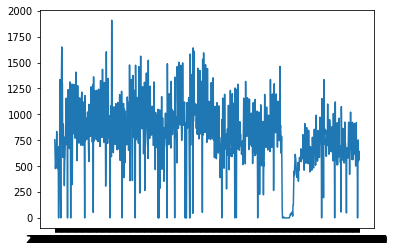

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(df10)

In [11]:
df10

array([[0.39497119],
       [0.33211105],
       [0.24934521],
       [0.27763227],
       [0.25248821],
       [0.34101624],
       [0.43740178],
       [0.35096909],
       [0.34782609],
       [0.30644316],
       [0.24829754],
       [0.27972761],
       [0.        ],
       [0.36039811],
       [0.32739654],
       [0.22629649],
       [0.69984285],
       [0.68884233],
       [0.11052907],
       [0.        ],
       [0.58198009],
       [0.74751179],
       [0.86485071],
       [0.67522263],
       [0.67993714],
       [0.30644316],
       [0.47511786],
       [0.47092719],
       [0.37873232],
       [0.34206391],
       [0.16343635],
       [0.28025144],
       [0.31220534],
       [0.41068622],
       [0.36877947],
       [0.45573599],
       [0.60607648],
       [0.43216344],
       [0.38344683],
       [0.45364065],
       [0.        ],
       [0.56102672],
       [0.64903091],
       [0.49607124],
       [0.43425877],
       [0.43949712],
       [0.35096909],
       [0.437

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))


852.8626143908403

In [24]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

703.0937622486407

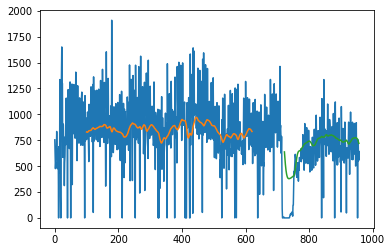

In [25]:
###plotting
# shift train  predictions for plotting
look_back=100
train_predictplot=np.empty_like(df10)
train_predictplot[:,:]=np.nan
train_predictplot[look_back:len(train_predict)+look_back,:]=train_predict


# shift test  predictions for plotting
look_back=100
test_predictplot=np.empty_like(df10)
test_predictplot[:,:]=np.nan
test_predictplot[len(train_predict)+(look_back*2)+1:len(df10)-1,:]=test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df10))
plt.plot(train_predictplot)
plt.plot(test_predictplot)
plt.show()

In [26]:
len(test_data)

336

(1, 100)

In [29]:
temp_input

[0.5762179151388162,
 0.391304347826087,
 0.40492404400209536,
 0.39287585123101104,
 0.322158198009429,
 0.34415924567836564,
 0.49764274489261395,
 0.46883184913567316,
 0.4206390780513358,
 0.3598742797276061,
 0.35096909376636987,
 0.3347302252488214,
 0.4159245678365637,
 0.4112100576217915,
 0.46202200104766894,
 0.4023048716605553,
 0.2970141435306443,
 0.2886327920377161,
 0.5280251440544788,
 0.356731272917758,
 0.39497118910424306,
 0.38135149292823467,
 0.0,
 0.5295966474594028,
 0.5866946045049765,
 0.33001571503404925,
 0.3530644316396019,
 0.34415924567836564,
 0.29177579884756416,
 0.26872708224201153,
 0.4814038763750655,
 0.26872708224201153,
 0.3603981141959141,
 0.3483499214248298,
 0.3074908328968046,
 0.3619696176008382,
 0.5049764274489261,
 0.3143006809848088,
 0.36616029334730227,
 0.34101623886851756,
 0.28077527501309585,
 0.3090623363017287,
 0.029858564693556838,
 0.5631220534311158,
 0.40754321634363544,
 0.31953902566788894,
 0.2964903090623363,
 0.3546359

NameError: ignored

In [35]:

day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [36]:
day_pred

array([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113,
       114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
       127, 128, 129, 130])

In [37]:
import matplotlib.pyplot as plt


In [38]:
len(df10)

958

In [40]:
len(lst_output)

30

In [42]:
df3=df10.tolist()
df3.extend(lst_output)

In [43]:
len(df3)

988

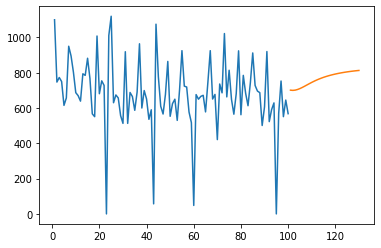

In [45]:
plt.plot(day_new,scaler.inverse_transform(df10[858:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

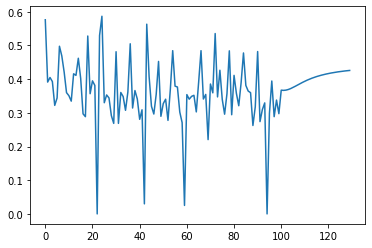

In [47]:
plt.plot(df3[858:])

In [1]:
lst_output


NameError: ignored

In [54]:
Pred_30

,0
0,701.179007
1,700.004231
2,701.411641
3,704.988879
4,710.217540
5,716.571081
6,723.576897
7,730.847719
8,738.089241
9,745.095625


array(['2017-12-11', '2017-12-12', '2017-12-13', '2017-12-14',
       '2017-12-15', '2017-12-16', '2017-12-18', '2017-12-19',
       '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-23',
       '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
       '2017-12-29', '2017-12-30', '2018-01-01', '2018-01-02',
       '2018-01-03', '2018-01-04', '2018-01-05', '2018-01-06',
       '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
       '2018-01-12', '2018-01-13', '2018-01-15', '2018-01-16',
       '2018-01-17', '2018-01-18', '2018-01-19', '2018-01-20',
       '2018-01-22', '2018-01-23', '2018-01-24', '2018-01-25',
       '2018-01-26', '2018-01-27', '2018-01-29', '2018-01-30',
       '2018-01-31', '2018-02-01', '2018-02-02', '2018-02-03',
       '2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08',
       '2018-02-09', '2018-02-10', '2018-02-12', '2018-02-13',
       '2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17',
       '2018-02-19', '2018-02-20', '2018-02-21', '2018-

TypeError: ignored